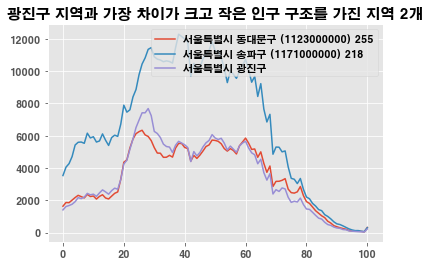

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
f = open('seoulpeople.csv')
df = pd.read_csv(f, header=0, index_col=0)
df2 = df.T
arr = np.array(df)
arr2 = arr.T
std_num1 = 0
num1_index = 0
str1 = ''
std_num2 = 0
num2_index = 0
str2 = ''

num = 0

for i in range(2, len(arr[0])):
    num1 = 0
    num2 = 0
    num_1000_1 = 1
    num_1000_2 = 1
    cal_num1 = arr[1][i].split(',')
    cal_num2 = arr[5][i].split(',')
    for j in range(-1, len(cal_num1) * -1 -1, -1) :
        num1 += int(cal_num1[j]) * num_1000_1
        num_1000_1 *= 1000
    for j in range(-1, len(cal_num2) * -1 -1, -1) :
        num2 += int(cal_num2[j]) * num_1000_2
        num_1000_2 *= 1000
    num += (num1 - num2) * (num1 - num2)
    arr[1][i] = num1
    arr[5][i] = num2
std_num1 = num
std_num2 = num

for i in range(2, len(arr2[0])):
    if i != 5:
        num = 0
        for j in range(2, len(arr[0])):
            num1 = 0
            num2 = arr[5][j]
            num_1000_1 = 1
            num_1000_2 = 1
            cal_num1 = arr[i][j].split(',')
            for k in range(-1, len(cal_num1) * -1 -1, -1) :
                num1 += int(cal_num1[k]) * num_1000_1
                num_1000_1 *= 1000
            num += (num1 - num2) * (num1 - num2)
            arr[i][j] = num1

        if(std_num1 > num):
            std_num1 = num
            num1_index = i
            str1 = list(df2)[i]
        if(std_num2 < num):
            std_num2 = num
            num2_index = i
            str2 = list(df2)[i]

print_arr1 = arr[num1_index]
print_arr2 = arr[num2_index]
base_arr = arr[5]

plt.title('광진구 지역과 가장 차이가 크고 작은 인구 구조를 가진 지역 2개')
plt.style.use('ggplot')
plt.plot(print_arr1[2:], label = str1 + " " + str(num1))
plt.plot(print_arr2[2:], label = str2 + " " + str(num2))
plt.plot(base_arr[2:], label = "서울특별시 광진구")
plt.legend()
plt.show()